In [23]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import hashlib

In [24]:
train_folder = r"C:\Users\ShaunM.AGSA\.cache\kagglehub\datasets\alessandrasala79\ai-vs-human-generated-dataset\versions\4\train_data"
test_folder = r"C:\Users\ShaunM.AGSA\.cache\kagglehub\datasets\alessandrasala79\ai-vs-human-generated-dataset\versions\4\test_data_v2"
train_images = [os.path.join(train_folder, img) for img in os.listdir(train_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Total Train Images: {len(train_images)}")
print(f"Total Test Images: {len(test_images)}")

Total Train Images: 79950
Total Test Images: 5540


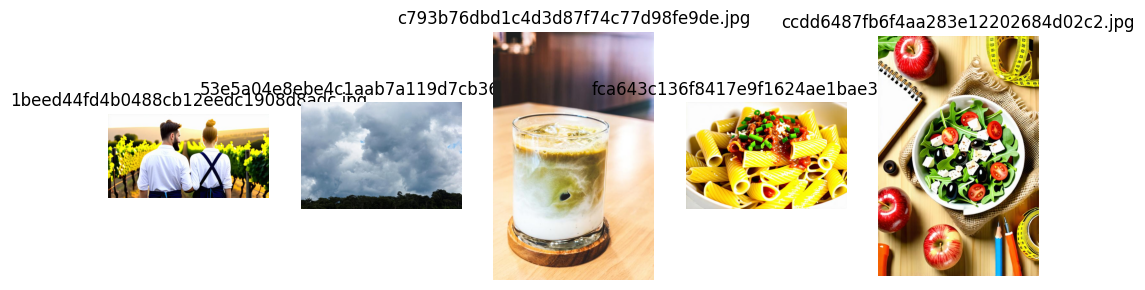

In [25]:
def show_random_images(image_paths, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img_path = np.random.choice(image_paths)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(img_path))
    plt.show()
show_random_images(train_images)

In [26]:
image_shapes = []
formats = []

for img_path in train_images[:100]:
    with Image.open(img_path) as img:
        image_shapes.append(img.size)
        formats.append(img.format)
print(f"Unique Image Sizes: {set(image_shapes)}")
print(f"Unique Formats: {set(formats)}")

Unique Image Sizes: {(768, 576), (480, 768), (768, 768), (528, 768), (768, 240), (768, 432), (768, 496), (768, 688), (688, 768), (512, 768), (768, 224), (768, 288), (768, 480), (768, 544), (768, 608), (768, 672), (768, 736), (496, 768), (768, 528), (768, 400), (768, 464), (768, 656), (768, 320), (768, 448), (768, 512)}
Unique Formats: {'JPEG'}


In [27]:
def check_corrupt_images(image_paths):
    corrupt_images = []
    for img_path in image_paths:
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)
    if corrupt_images:
        print(f"Found {len(corrupt_images)} corrupt images.")
        print(corrupt_images)
    else:
        print("No corrupt images found.")
check_corrupt_images(train_images)

No corrupt images found.


In [28]:
df_shapes = pd.DataFrame(image_shapes, columns=['Width', 'Height'])
print(df_shapes.describe())

            Width      Height
count  100.000000  100.000000
mean   743.680000  545.280000
std     75.441178  126.326024
min    480.000000  224.000000
25%    768.000000  512.000000
50%    768.000000  512.000000
75%    768.000000  576.000000
max    768.000000  768.000000


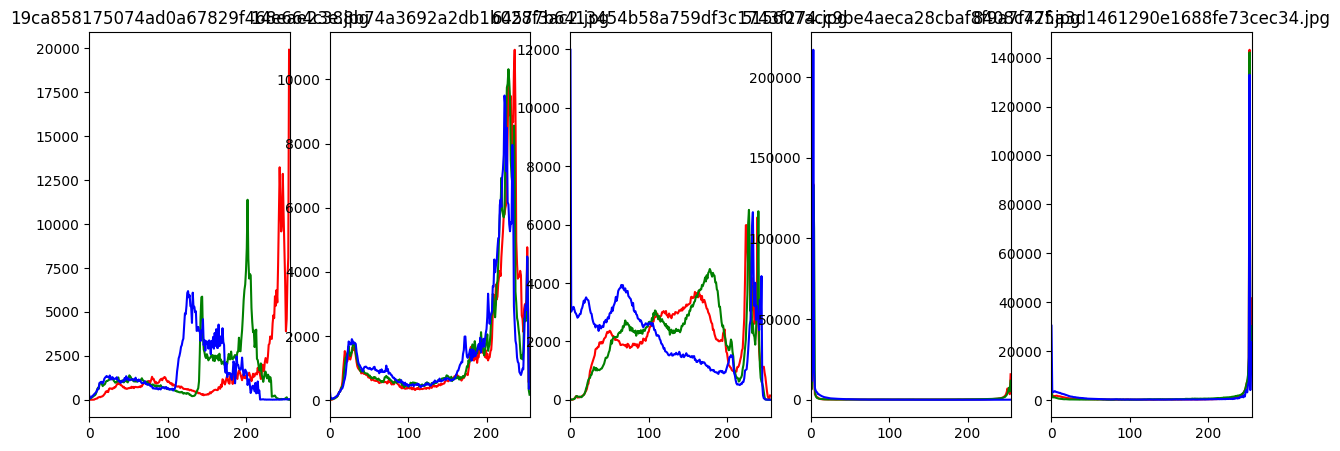

In [29]:
def plot_rgb_distribution(image_paths, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        img_path = np.random.choice(image_paths)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        color = ('r', 'g', 'b')
        plt.subplot(1, num_samples, i + 1)
        for j, col in enumerate(color):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=col)
            plt.xlim([0, 256])
        plt.title(os.path.basename(img_path))
    plt.show()
plot_rgb_distribution(train_images)

In [30]:
def get_image_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()
image_hashes = {img_path: get_image_hash(img_path) for img_path in train_images}
hash_values = list(image_hashes.values())
duplicates = [img for img, h in image_hashes.items() if hash_values.count(h) > 1]
if duplicates:
    print(f"Found {len(duplicates)} duplicate images.")
else:
    print("No duplicate images found.")

No duplicate images found.


label
1    39975
0    39975
Name: count, dtype: int64


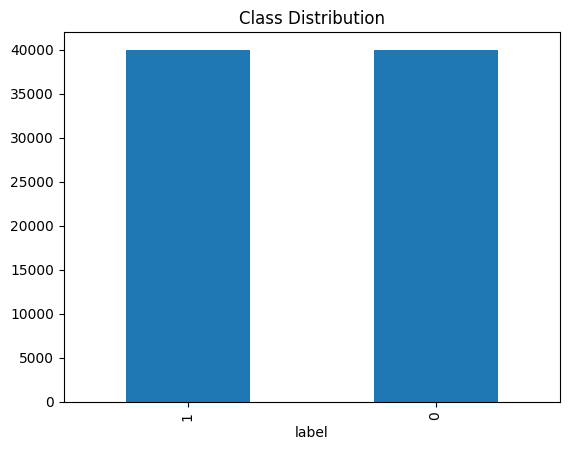

In [ ]:
label_file = r"C:\Users\ShaunM\.cache\kagglehub\datasets\alessandrasala79\ai-vs-human-generated-dataset\versions\4\train.csv"
df_labels = pd.read_csv(label_file)
print(df_labels['label'].value_counts())
df_labels['label'].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

In [32]:
test_data_path = r"C:\Users\ShaunM.AGSA\.cache\kagglehub\datasets\alessandrasala79\ai-vs-human-generated-dataset\versions\4\test_data_v2"
image_files = [f for f in os.listdir(test_data_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Total images in test_data_v2: {len(image_files)}")
formats = [os.path.splitext(f)[1] for f in image_files]
print(f"Image Format Distribution: {Counter(formats)}")

Total images in test_data_v2: 5540
Image Format Distribution: Counter({'.jpg': 5540})


Unique image resolutions: [[ 416  768]
 [ 427 1000]
 [ 432  768]
 [ 446 1000]
 [ 448  768]
 [ 452 1000]
 [ 464  768]
 [ 480  768]
 [ 496  768]
 [ 512  768]
 [ 528  768]
 [ 544  768]
 [ 560  768]
 [ 563 1000]
 [ 576  768]
 [ 590 1000]
 [ 608  768]
 [ 609 1000]
 [ 610 1000]
 [ 615 1000]
 [ 621 1000]
 [ 624  768]
 [ 627 1000]
 [ 635 1000]
 [ 640  768]
 [ 643 1000]
 [ 644 1000]
 [ 648 1000]
 [ 651 1000]
 [ 653 1000]
 [ 656  768]
 [ 656 1000]
 [ 659 1000]
 [ 660 1000]
 [ 662 1000]
 [ 663 1000]
 [ 664 1000]
 [ 665 1000]
 [ 666 1000]
 [ 667 1000]
 [ 668 1000]
 [ 669 1000]
 [ 671 1000]
 [ 672  768]
 [ 673 1000]
 [ 674 1000]
 [ 675 1000]
 [ 676 1000]
 [ 677 1000]
 [ 678 1000]
 [ 681 1000]
 [ 682 1000]
 [ 683 1000]
 [ 684 1000]
 [ 687 1000]
 [ 688  768]
 [ 688 1000]
 [ 689 1000]
 [ 690 1000]
 [ 691 1000]
 [ 692 1000]
 [ 694 1000]
 [ 695 1000]
 [ 696 1000]
 [ 697 1000]
 [ 698 1000]
 [ 700 1000]
 [ 702 1000]
 [ 703 1000]
 [ 704  768]
 [ 706 1000]
 [ 707 1000]
 [ 708 1000]
 [ 710 1000]
 [ 712 1000]

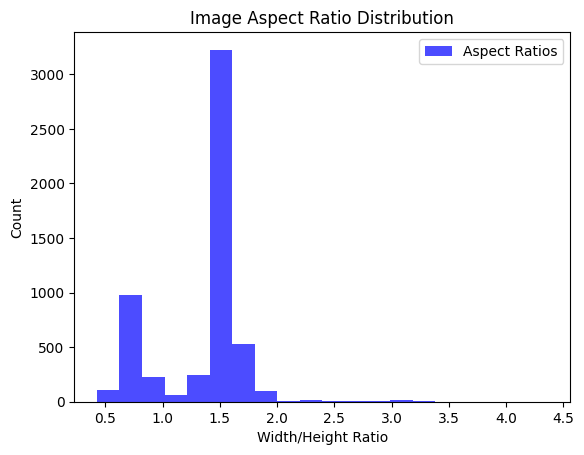

In [33]:
dimensions = []
for img_file in image_files:
    img_path = os.path.join(test_data_path, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        dimensions.append((w, h))
dimensions = np.array(dimensions)
print("Unique image resolutions:", np.unique(dimensions, axis=0))
plt.hist(dimensions[:, 0] / dimensions[:, 1], bins=20, alpha=0.7, color='blue', label='Aspect Ratios')
plt.xlabel("Width/Height Ratio")
plt.ylabel("Count")
plt.title("Image Aspect Ratio Distribution")
plt.legend()
plt.show()

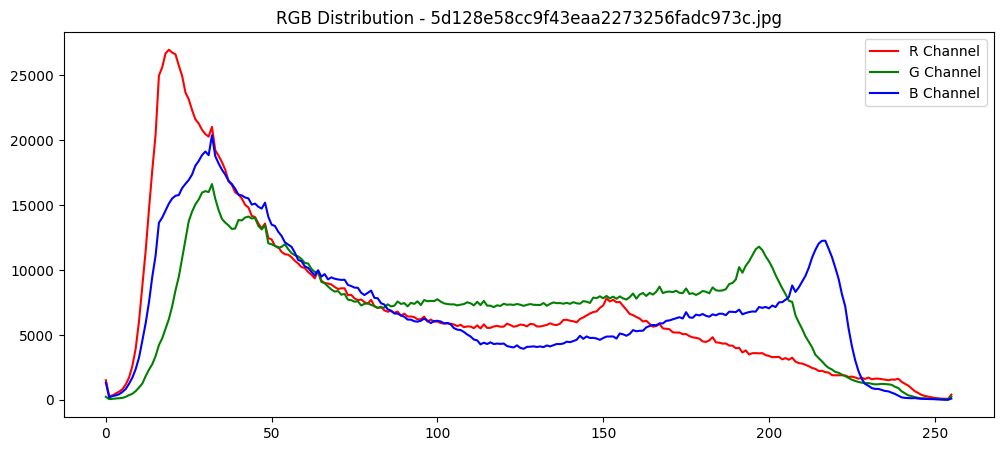

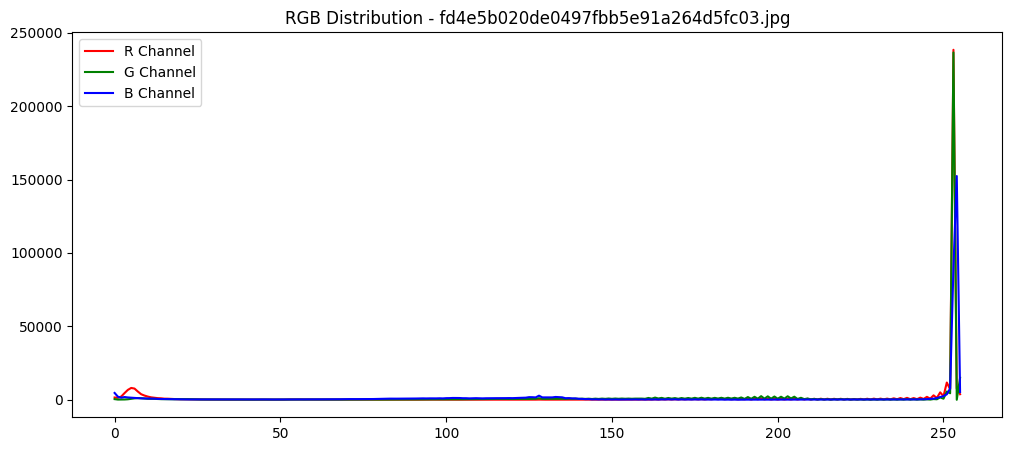

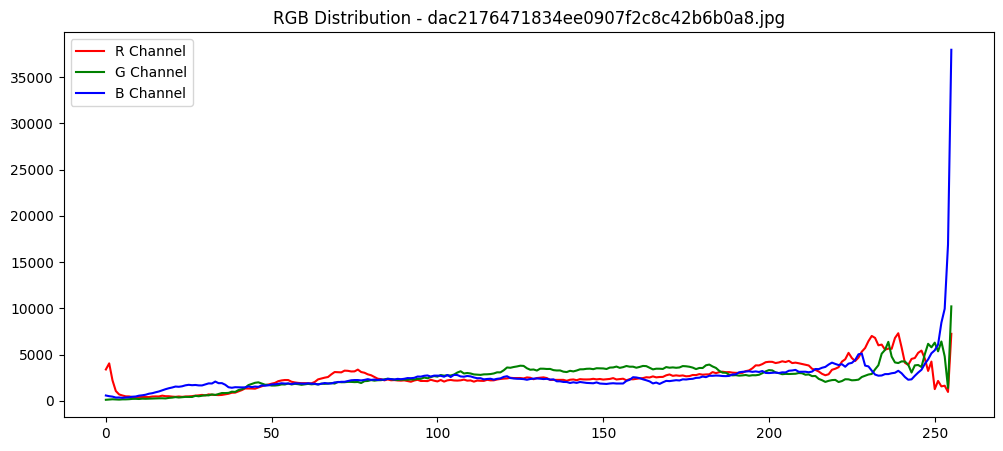

In [34]:
def plot_rgb_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(12, 5))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=f"{color.upper()} Channel")
    plt.legend()
    plt.title(f"RGB Distribution - {os.path.basename(image_path)}")
    plt.show()
for img_file in np.random.choice(image_files, 3):
    plot_rgb_histogram(os.path.join(test_data_path, img_file))